In [1]:
import intrinsic_params
from bilby.core.result import read_in_result
from scipy.interpolate import interp1d
import numpy as np
import deepdish as dd
import matplotlib.pyplot as plt

In [2]:
np.__version__

'1.21.0'

In [3]:
PP_path = '../GWTC-3-population-data/analyses/PowerLawPeak/o1o2o3_mass_c_iid_mag_iid_tilt_powerlaw_redshift_result.json'
PP_result = read_in_result(PP_path)

In [4]:
PP_hyperposterior_samples = PP_result.posterior.copy() # making a copy is best practice here so you don't accidentally modify things in-place
PP_hyperposterior_samples

,alpha,beta,mmax,mmin,lam,mpp,sigpp,delta_m,mu_chi,sigma_chi,...,lamb,amax,log_likelihood,log_prior,selection,pdet_n_effective,surveyed_hypervolume,log_10_rate,rate,min_event_n_effective
0,3.476035,1.192781,91.137635,3.335027,0.045152,32.019619,7.361617,5.502380,0.430299,0.037676,...,0.593878,1.0,86.219165,-20.158271,0.001980,5600.884717,1102.923927,1.539321,34.619495,184.210871
1,2.843807,0.551632,92.336309,3.455594,0.099132,21.146326,9.635711,3.504334,0.229716,0.027052,...,3.899003,1.0,88.795439,-20.158271,0.000176,7628.305892,24548.963167,1.203419,15.974191,91.831207
2,4.127894,1.910420,99.382743,4.114949,0.058528,26.304442,9.105968,4.430823,0.297703,0.036759,...,-0.096742,1.0,89.598445,-20.158271,0.002577,4734.966457,617.064144,1.681428,48.020645,94.982019
3,4.512565,1.291055,98.845047,2.963035,0.007879,32.267134,9.914114,9.800366,0.378698,0.052658,...,3.511903,1.0,90.035214,-20.158271,0.000295,5654.797132,16703.390755,1.146385,14.008291,289.936772
4,2.772482,0.149371,94.491001,5.138160,0.035747,30.469008,8.569162,3.361789,0.336149,0.034270,...,2.514446,1.0,90.339131,-20.158271,0.000582,8247.427572,6336.065138,1.302851,20.084052,261.964627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11179,3.388853,1.075150,89.768520,4.684262,0.030388,35.727936,3.478996,5.246642,0.244086,0.027675,...,2.733047,1.0,107.871029,-20.158271,0.000525,3796.539977,7811.787060,1.235183,17.186329,71.639539
11180,3.684463,1.539779,81.785901,5.327478,0.030328,34.102957,3.505780,5.133147,0.251205,0.033394,...,3.171738,1.0,107.877236,-20.158271,0.000377,4006.532961,11954.783380,1.175202,14.969305,72.109121
11181,3.684463,1.539779,81.785901,5.327478,0.030328,34.102957,3.505780,5.133147,0.251205,0.033394,...,3.171738,1.0,107.877236,-20.158271,0.000377,4006.532961,11954.783380,1.169904,14.787819,72.109121
11182,3.573136,0.627634,88.689645,5.303211,0.029184,34.600418,3.531467,4.342366,0.229689,0.032670,...,3.456785,1.0,107.909312,-20.158271,0.000266,3745.787380,15818.169705,1.239911,17.374440,73.194989


In [20]:
sample = intrinsic_params.sample_intrinsic(PP_hyperposterior_samples.iloc[9], 100)

(array([44., 10., 11., 10.,  9.,  9.,  2.,  1.,  0.,  4.]),
 array([ 5.36082226, 10.57247239, 15.78412251, 20.99577264, 26.20742276,
        31.41907289, 36.63072301, 41.84237314, 47.05402326, 52.26567339,
        57.47732351]),
 <BarContainer object of 10 artists>)

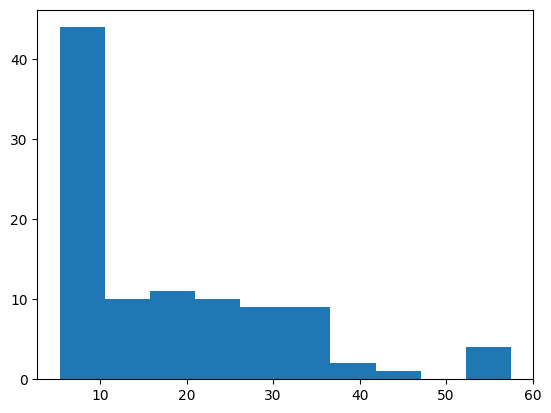

In [14]:
plt.hist(sample['m1'])
plt.xlabel('m_1 /solar masses')
plt.ylabel(r'$p(m_1|\Lambda_i)$')

(array([ 1.,  0.,  3.,  5.,  2., 10., 11., 14., 29., 25.]),
 array([0.65612746, 0.69039509, 0.72466272, 0.75893035, 0.79319798,
        0.82746561, 0.86173324, 0.89600087, 0.9302685 , 0.96453613,
        0.99880376]),
 <BarContainer object of 10 artists>)

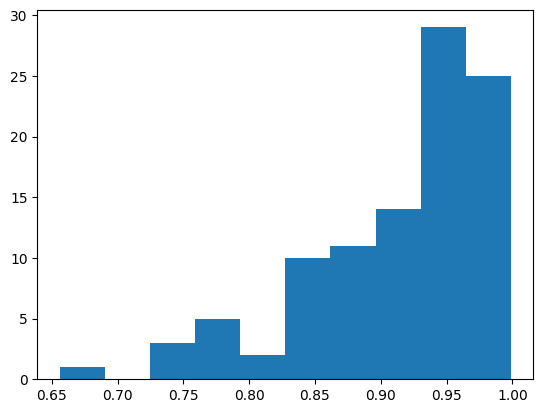

In [15]:
plt.hist(sample['q'])

(array([ 1.,  2.,  4., 11., 12.,  7., 18., 13., 16., 16.]),
 array([0.41543216, 0.59791435, 0.78039654, 0.96287873, 1.14536092,
        1.32784311, 1.5103253 , 1.69280749, 1.87528968, 2.05777187,
        2.24025406]),
 <BarContainer object of 10 artists>)

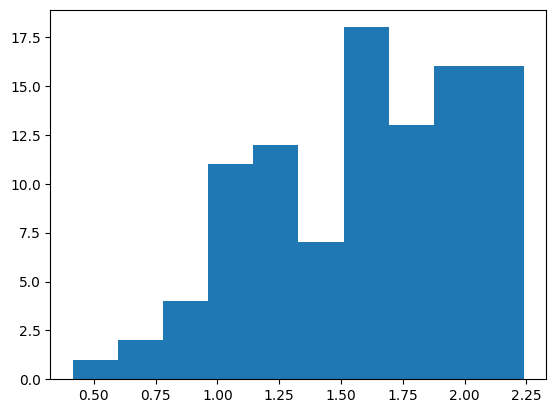

In [16]:
plt.hist(sample['z'])

(array([21., 20., 15., 19.,  3.,  9.,  4.,  5.,  3.,  1.]),
 array([0.00530611, 0.08596319, 0.16662026, 0.24727733, 0.32793441,
        0.40859148, 0.48924856, 0.56990563, 0.6505627 , 0.73121978,
        0.81187685]),
 <BarContainer object of 10 artists>)

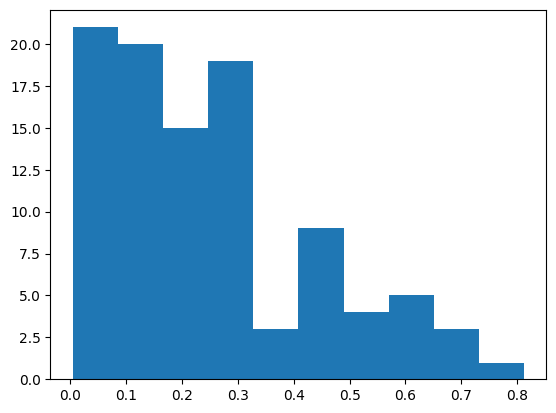

In [18]:
plt.hist(sample['chi_1'])

(array([ 5.,  4.,  9., 11.,  4., 11., 13., 16., 14., 13.]),
 array([-0.99336544, -0.79962939, -0.60589335, -0.4121573 , -0.21842125,
        -0.02468521,  0.16905084,  0.36278689,  0.55652294,  0.75025898,
         0.94399503]),
 <BarContainer object of 10 artists>)

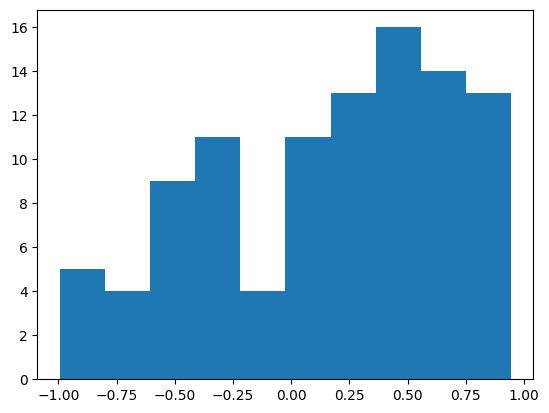

In [21]:
plt.hist(sample['costilt_1'])